# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
#env = UnityEnvironment(file_name="E:\\ai\\deep-reinforcement-learning\\p1_navigation\\banana\\Banana.exe")
env = UnityEnvironment(file_name="./banana/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
#env_info = env.reset(train_mode=False)[brain_name] # reset the environment
#state = env_info.vector_observations[0]            # get the current state
#score = 0                                          # initialize the score
#while True:
#    action = np.random.randint(action_size)        # select an action
#    env_info = env.step(action)[brain_name]        # send the action to the environment
#    next_state = env_info.vector_observations[0]   # get the next state
#    reward = env_info.rewards[0]                   # get the reward
#    done = env_info.local_done[0]                  # see if episode has finished
#    score += reward                                # update the score
#    state = next_state                             # roll over the state to next time step
#    if done:                                       # exit loop if episode finished
#        break
#    
#print("Score: {}".format(score))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

## 4.1 Imports

In [7]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt

## 4.2 Define the Network

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=64, fc2_units=64):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)

    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return self.fc3(x)


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class QNetworkConfigurable(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, layers = [64, 64]):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            layers (array of int) : the size of the required hidden layers to be configured
        """
        super(QNetworkConfigurable, self).__init__()
        self.seed = torch.manual_seed(seed)
        
        
        numLayers = (len(layers) + 2)
        dims = [None] * numLayers
        dims[0] = state_size
        dims[numLayers - 1] = action_size
        for i in range (1, numLayers -1):
            dims[i] = layers[i - 1]
        
        self.layers = nn.ModuleList()
        
        for i in range (0, len(dims)-1):
            self.layers[i] =nn.Linear(dims[i], dims[i+1])        

    def forward(self, state):
        """Build a network that maps state -> action values.
        Params
        ======
        state (array like): the current state to pass through the network
        """
        x = F.relu(self.layers[0](state))
        
        for i in range(1, len(self.layers)-2):
            x = F.relu(self.layers[i](x))
        
        return self.layers[len(self.layers)-1](x)

## 4.3 Define the Agent
This code is based on the Udacity solution to the Lunar Lander exercise

In [ ]:
import numpy as np
import random
from collections import namedtuple, deque

import torch
import torch.nn.functional as F
import torch.optim as optim

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate 
UPDATE_EVERY = 4        # how often to update the network

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, state_size, action_size, seed, hidden_layers=[64,64]):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        
        # Q-Network
        self.qnetwork_local = QNetworkConfigurable(state_size, action_size, seed, hidden_layers).to(device)
        self.qnetwork_target = QNetworkConfigurable(state_size, action_size, seed, hidden_layers).to(device)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR)

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0
    
    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train()

        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # Get max predicted Q values (for next states) from target model
        Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        # Compute Q targets for current states 
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # Get expected Q values from local model
        Q_expected = self.qnetwork_local(states).gather(1, actions)

        # Compute loss
        loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # update target network
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)


class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

## 4.5 Define Training Mechinism
This function trains a provided agent and environment
This code is based on the Udacity solution to the Lunar Lander exercise

In [11]:
def dqn(agent, env, brain_name, n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.0001, 
        eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        agent (Agent) : the agent being trained
        env (unityagents) : the environment to train withing
        brain_name (string) : the name of the brain taking action
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):       
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(vector_action=[action])[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores


## 4.5 Train a baseline agent
The following is a baseline agent used to compare the effects of different parameters and architectures

Episode 100	Average Score: 0.58
Episode 200	Average Score: 4.25
Episode 300	Average Score: 7.83
Episode 400	Average Score: 9.92
Episode 500	Average Score: 12.53
Episode 535	Average Score: 13.00
Environment solved in 435 episodes!	Average Score: 13.00


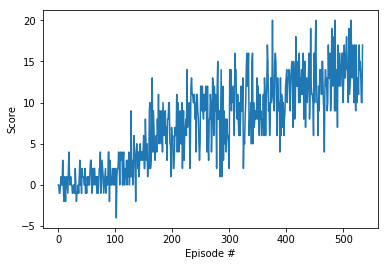

In [12]:
SEED = 73
agent = Agent(state_size = state_size, action_size = action_size, seed = SEED)

scores = dqn(agent, env, brain_name)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## 4.7 Parameter Tuning
The following is a series of experiments to vary some of the paramters to understand how they affect the performance of the Agent compared to the above baseline

### 4.7.1 EPS Decay Rates
Experiments to understand the effect of different *eps decay* rates have on learning
In the initial experiment, an EPS_Decay rate of **0.01** was used and the Agent achieved the goal in ~300 episodes.
This experiment was to determine how different decay rates affect meeting the goal 

*** EPS DECAY RATE 0.999
Episode 100	Average Score: 0.27
Episode 200	Average Score: 0.44
Episode 300	Average Score: 1.44
Episode 400	Average Score: 2.01
Episode 500	Average Score: 3.31
Episode 600	Average Score: 3.98
Episode 700	Average Score: 4.87
Episode 800	Average Score: 5.53
Episode 900	Average Score: 6.10
Episode 1000	Average Score: 7.11


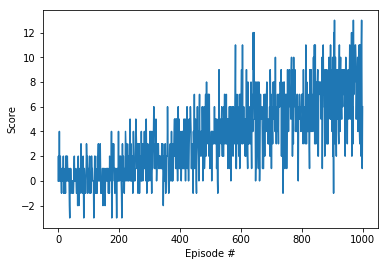

*** EPS DECAY RATE 0.99
Episode 100	Average Score: -0.02
Episode 200	Average Score: 1.621
Episode 300	Average Score: 7.17
Episode 400	Average Score: 11.33
Episode 448	Average Score: 13.06
Environment solved in 348 episodes!	Average Score: 13.06


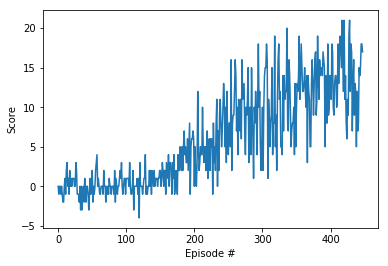

*** EPS DECAY RATE 0.9
Episode 100	Average Score: 0.85
Episode 200	Average Score: 7.30
Episode 300	Average Score: 10.68
Episode 391	Average Score: 13.06
Environment solved in 291 episodes!	Average Score: 13.06


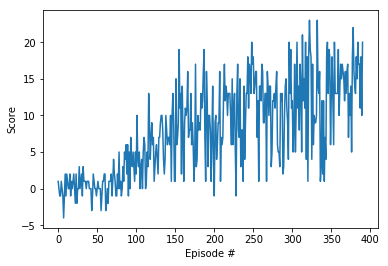

In [13]:
eps_decay_rates = [0.999, 0.99, 0.9]

for decay in eps_decay_rates:
    agent = Agent(state_size = state_size, action_size = action_size, seed = SEED)
    
    print ("*** EPS DECAY RATE {}".format(decay))

    scores = dqn(agent, env, brain_name, eps_decay=decay)

    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

### 4.7.2 Start and End EPS Values

*** START EPS 0.75
Episode 100	Average Score: 0.67
Episode 200	Average Score: 4.61
Episode 300	Average Score: 9.22
Episode 400	Average Score: 10.54
Episode 500	Average Score: 12.63
Episode 507	Average Score: 13.00
Environment solved in 407 episodes!	Average Score: 13.00


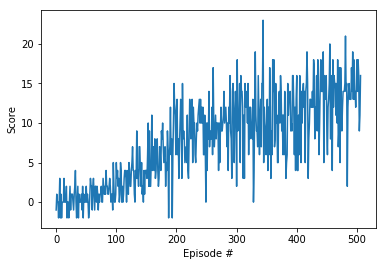

*** START EPS 0.5
Episode 100	Average Score: 0.06
Episode 200	Average Score: 3.45
Episode 300	Average Score: 8.57
Episode 400	Average Score: 11.05
Episode 450	Average Score: 13.02
Environment solved in 350 episodes!	Average Score: 13.02


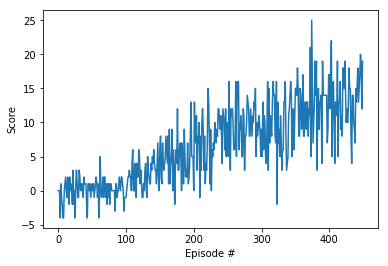

*** START EPS 0.25
Episode 100	Average Score: 1.79
Episode 200	Average Score: 7.40
Episode 300	Average Score: 11.54
Episode 376	Average Score: 13.15
Environment solved in 276 episodes!	Average Score: 13.15


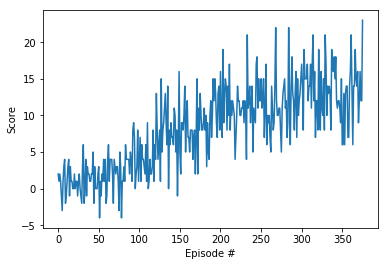

In [14]:
start_eps = [0.75, 0.5, 0.25]

for start in start_eps:
    print ("*** START EPS {}".format(start))
    agent = Agent(state_size = state_size, action_size = action_size, seed = SEED)

    scores = dqn(agent, env, brain_name, eps_start=start)

    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

*** END EPS 0.1
Episode 100	Average Score: 0.40
Episode 200	Average Score: 4.88
Episode 300	Average Score: 8.87
Episode 400	Average Score: 10.45
Episode 500	Average Score: 12.17
Episode 600	Average Score: 12.89
Episode 700	Average Score: 12.46
Episode 800	Average Score: 12.75
Episode 822	Average Score: 13.03
Environment solved in 722 episodes!	Average Score: 13.03


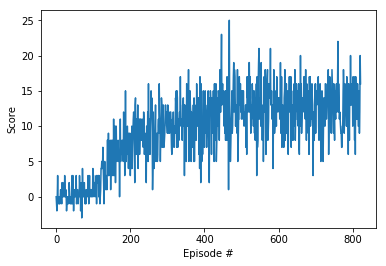

*** END EPS 0.01
Episode 100	Average Score: 0.31
Episode 200	Average Score: 3.58
Episode 300	Average Score: 7.87
Episode 400	Average Score: 10.00
Episode 500	Average Score: 12.54
Episode 600	Average Score: 12.65
Episode 625	Average Score: 13.03
Environment solved in 525 episodes!	Average Score: 13.03


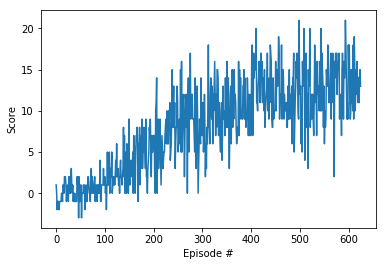

*** END EPS 0.001
Episode 100	Average Score: 0.16
Episode 200	Average Score: 4.34
Episode 300	Average Score: 7.96
Episode 400	Average Score: 9.48
Episode 500	Average Score: 12.27
Episode 531	Average Score: 13.01
Environment solved in 431 episodes!	Average Score: 13.01


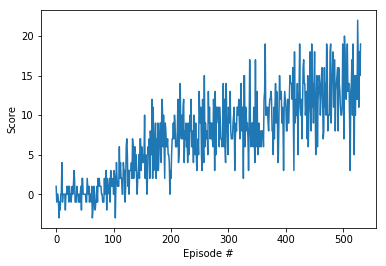

*** END EPS 1e-05
Episode 100	Average Score: 0.21
Episode 200	Average Score: 1.15
Episode 300	Average Score: 6.22
Episode 400	Average Score: 10.32
Episode 500	Average Score: 11.87
Episode 573	Average Score: 13.00
Environment solved in 473 episodes!	Average Score: 13.00


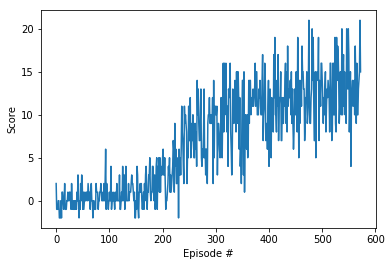

In [15]:
end_eps = [0.1, 0.01, 0.001, 0.00001]

for end in end_eps:
    print ("*** END EPS {}".format(end))
    agent = Agent(state_size = state_size, action_size = action_size, seed = SEED)

    scores = dqn(agent, env, brain_name, eps_end=end)

    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

### 4.7.3 Network Depth & Size
This experiment is to determine how the depth and size of the network used affects the learning

*** Hidden Layer Sizes [32, 32]
Episode 100	Average Score: 0.99
Episode 200	Average Score: 3.81
Episode 300	Average Score: 7.08
Episode 400	Average Score: 10.38
Episode 500	Average Score: 12.10
Episode 600	Average Score: 11.99
Episode 680	Average Score: 13.03
Environment solved in 580 episodes!	Average Score: 13.03


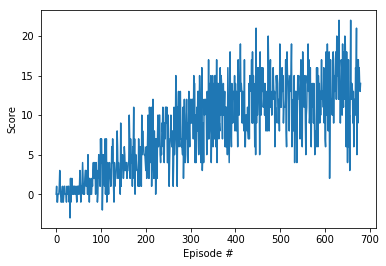

*** Hidden Layer Sizes [128, 128]
Episode 100	Average Score: 0.39
Episode 200	Average Score: 4.09
Episode 300	Average Score: 7.69
Episode 400	Average Score: 9.841
Episode 500	Average Score: 12.35
Episode 600	Average Score: 12.71
Episode 642	Average Score: 13.03
Environment solved in 542 episodes!	Average Score: 13.03


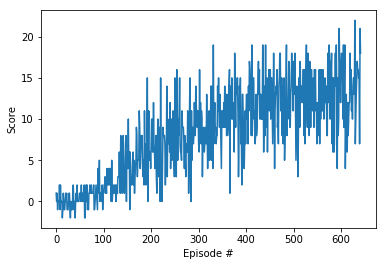

*** Hidden Layer Sizes [256, 256]
Episode 100	Average Score: 0.96
Episode 200	Average Score: 4.56
Episode 300	Average Score: 7.50
Episode 400	Average Score: 8.36
Episode 500	Average Score: 10.67
Episode 600	Average Score: 12.68
Episode 700	Average Score: 12.74
Episode 800	Average Score: 12.69
Episode 859	Average Score: 13.04
Environment solved in 759 episodes!	Average Score: 13.04


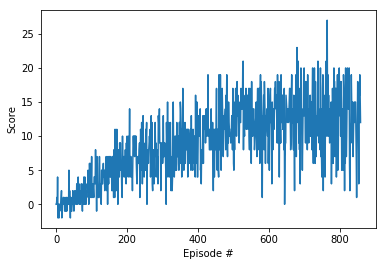

In [16]:
network_sizes = [
    [32, 32],
    [128, 128],
    [256, 256]
]

for layers in network_sizes:
    print ("*** Hidden Layer Sizes {}".format(layers))
    agent = Agent(state_size = state_size, action_size = action_size, seed = SEED,
                  hidden_layers = layers)
    
    scores = dqn(agent, env, brain_name)

    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

*** Hidden Layer Sizes [32, 32, 32]
Episode 100	Average Score: 0.90
Episode 200	Average Score: 3.83
Episode 300	Average Score: 6.24
Episode 400	Average Score: 9.01
Episode 500	Average Score: 12.23
Episode 592	Average Score: 13.01
Environment solved in 492 episodes!	Average Score: 13.01


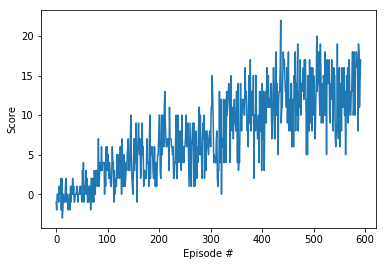

*** Hidden Layer Sizes [64, 64, 64]
Episode 100	Average Score: 0.86
Episode 200	Average Score: 3.02
Episode 300	Average Score: 6.89
Episode 400	Average Score: 9.52
Episode 500	Average Score: 12.29
Episode 535	Average Score: 13.03
Environment solved in 435 episodes!	Average Score: 13.03


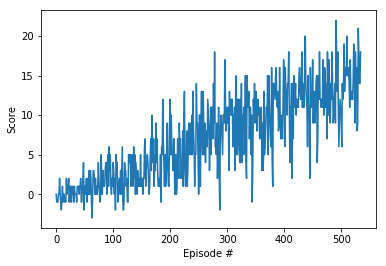

In [17]:
network_sizes = [
    [32, 32, 32],
    [64, 64, 64]
]

for layers in network_sizes:
    print ("*** Hidden Layer Sizes {}".format(layers))
    agent = Agent(state_size = state_size, action_size = action_size, seed = SEED,
                  hidden_layers = layers)
    
    scores = dqn(agent, env, brain_name, n_episodes=600)

    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

## 4.8 Optimised Network
Based on the above tuning experiments the following network has been selected

Episode 100	Average Score: 3.36
Episode 200	Average Score: 6.95
Episode 300	Average Score: 12.55
Episode 375	Average Score: 13.01
Environment solved in 275 episodes!	Average Score: 13.01


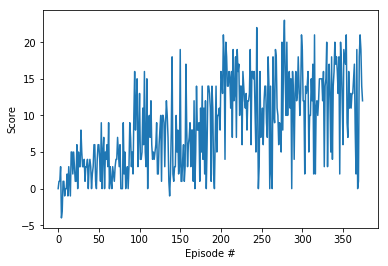

In [22]:
layers = [64, 64, 64]
eps_start = 1.0
eps_end = 0.0001
eps_decay = 0.9

agent = Agent(state_size = state_size, action_size = action_size, seed = SEED,
              hidden_layers = layers)
    
scores = dqn(agent, env, brain_name, eps_start = eps_start, 
             eps_end = eps_end, eps_decay = eps_decay)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## 4.8.1 Observe the Agent in Action

In [23]:
 import time

# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

best_score = 0.0
for i in range(5):
    env_info = env.reset(train_mode=False)[brain_name]
    score = 0.0
    for j in range(1000):
        # Adding a short sleep to allow for better viewing of the train network
        time.sleep(0.005)
        action = agent.act(state)
        env_info = env.step(vector_action=[action])[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        state = next_state
        score += reward
        if done:
            break
        print("\rGame {} score {}".format(i+1, score), end="")
    if score > best_score:
        best_score = score
    print("\nGame {} score {} - best score {}".format(i+1, score, best_score))
print("\nBest Score: {}".format(best_score))

Game 1 score 5.0
Game 1 score 5.0 - best score 5.0
Game 2 score 17.0
Game 2 score 17.0 - best score 17.0
Game 3 score 3.0
Game 3 score 3.0 - best score 17.0
Game 4 score 18.0
Game 4 score 18.0 - best score 18.0
Game 5 score 12.0
Game 5 score 12.0 - best score 18.0

Best Score: 18.0


In [24]:
# When you are finished run this cell to close the environment
env.close()